### Importing and reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [18]:
df=pd.read_csv('train.csv')

ParserError: ignored

### Exploratory Data Analysis

In [19]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0.0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0.0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1.0
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0.0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0.0


In [17]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,73150.000000,73150.000000,73150.000000,73150.000000,73150.000000,73150.00000,73150.000000,73150.000000
mean,1184.275174,4.770548,1.292071,99.556553,12.965044,15.07195,127.593548,0.278865
std,4866.572632,5.092303,0.929811,88.504048,19.816255,12.47313,100.845791,0.448444
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.50000,0.000000,0.000000
25%,445.000000,1.950000,1.000000,52.500000,0.000000,6.00000,70.200000,0.000000
50%,706.000000,3.200000,1.000000,75.000000,9.000000,9.75000,101.700000,0.000000
75%,1096.000000,5.730000,1.000000,116.250000,20.000000,26.45000,152.250000,1.000000
max,86387.000000,315.250000,9.000000,4466.250000,1185.000000,230.87500,4472.250000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73150 entries, 0 to 73149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       73150 non-null  float64
 1   distance_traveled   73150 non-null  float64
 2   num_of_passengers   73150 non-null  float64
 3   fare                73150 non-null  float64
 4   tip                 73150 non-null  int64  
 5   miscellaneous_fees  73150 non-null  float64
 6   total_fare          73150 non-null  float64
 7   surge_applied       73150 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 5.0 MB


#### To find missing values

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

#### To find duplicates and to delete them.

In [21]:
df.duplicated().sum()

592

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

#### Bivariate Analysis

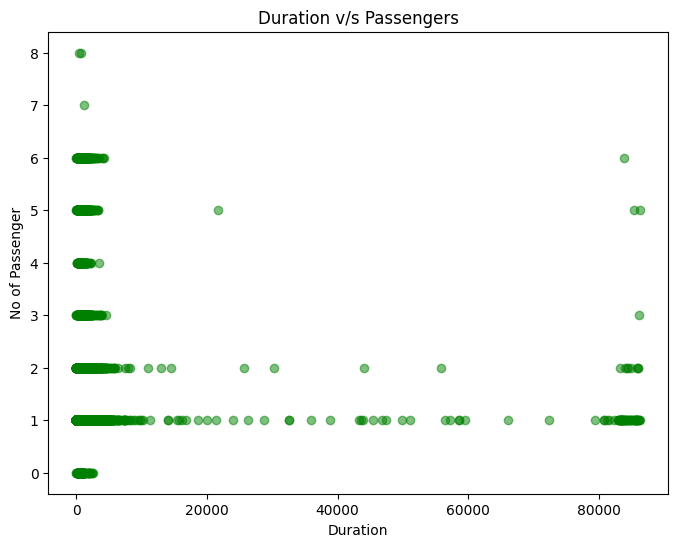

In [ ]:
x=df['trip_duration']
y=df['num_of_passengers']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='green',alpha=0.5)
plt.title('Duration v/s Passengers')
plt.xlabel('Duration')
plt.ylabel('No of Passenger')
plt.show()

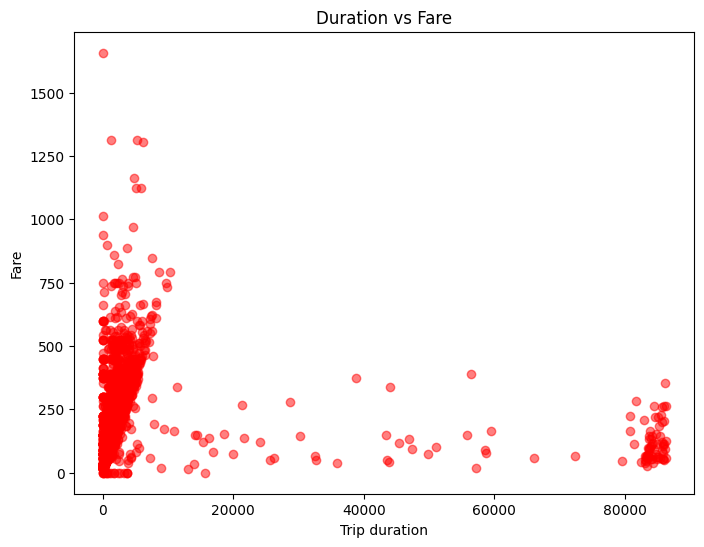

In [ ]:
x=df['trip_duration']
y=df['fare']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='red',alpha=0.5)
plt.title('Duration vs Fare')
plt.xlabel('Trip duration')
plt.ylabel('Fare')
plt.show()

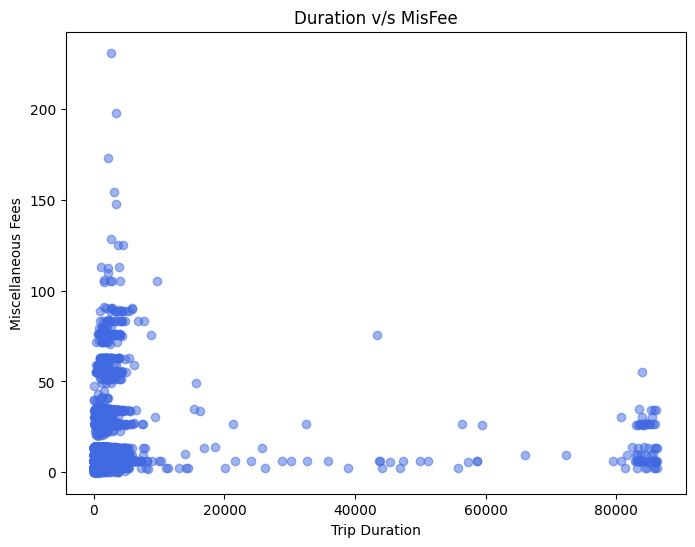

In [ ]:
x=df['trip_duration']
y=df['miscellaneous_fees']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='royalblue',alpha=0.5)
plt.title('Duration v/s MisFee')
plt.xlabel('Trip Duration')
plt.ylabel('Miscellaneous Fees')
plt.show()

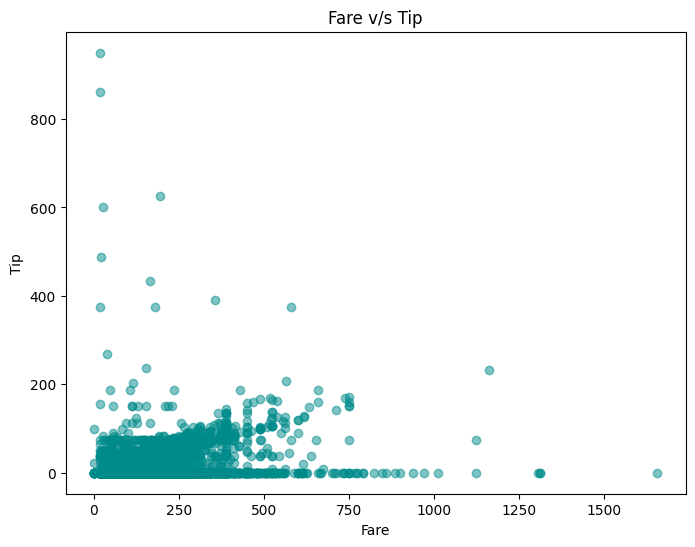

In [ ]:
x=df['fare']
y=df['tip']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='darkcyan',alpha=0.5)
plt.title('Fare v/s Tip')
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.show()

#### Outlier detection using visualization

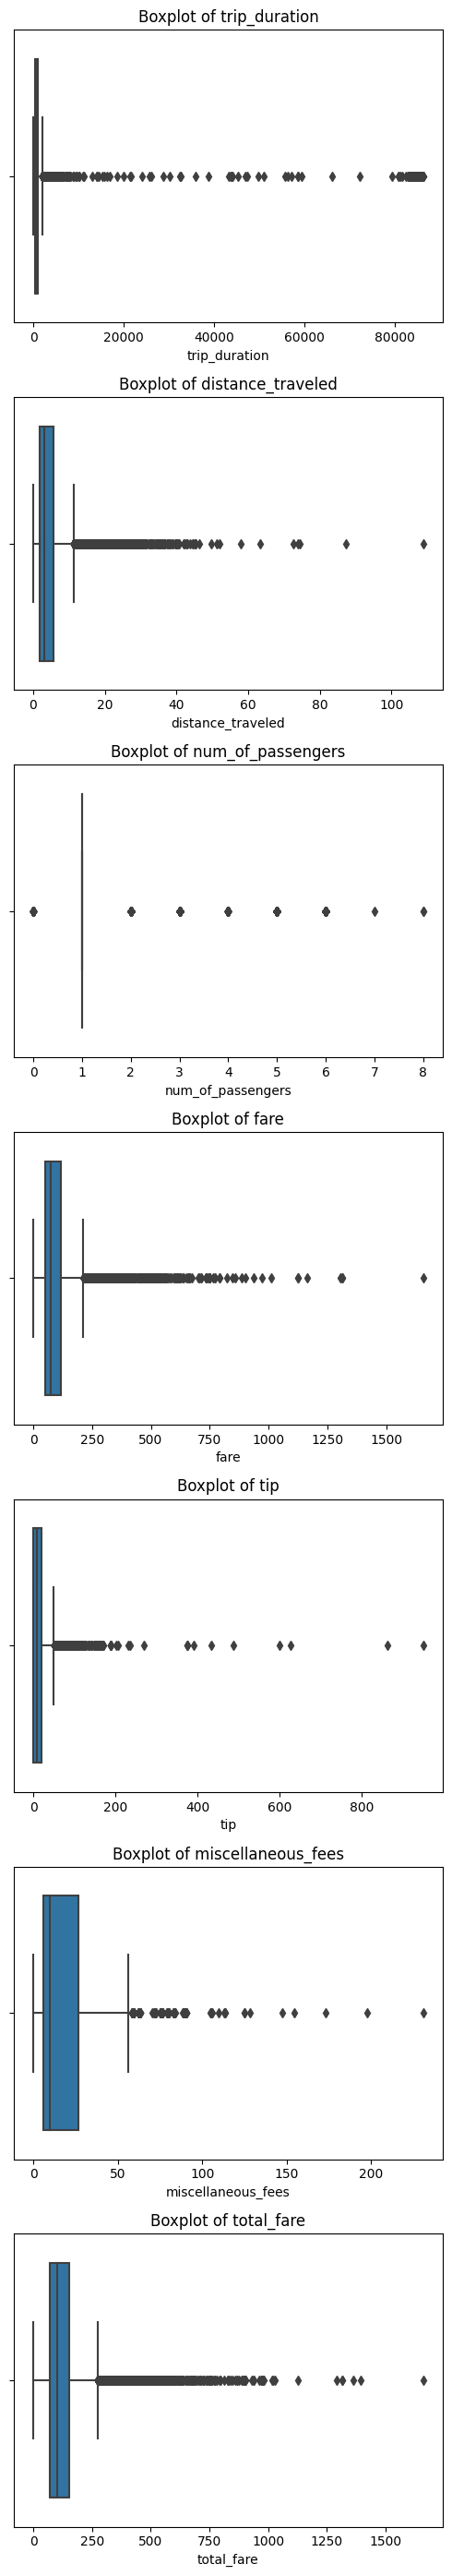

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns you want to create boxplots for
columns_of_interest = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_of_interest), figsize=(5, 4 * len(columns_of_interest)))

# Iterate through the columns and create boxplots
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


#### Outlier detection using z-score

In [35]:
columns_of_interest = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']
outlier={}
for column in columns_of_interest:
    z_score=stats.zscore(df[column])
    is_outlier=(z_score>3) | (z_score<-3)
    #is_outlier=(abs(z_score) < 3).all(axis=1)
    outlier[column]=df[column][is_outlier]

for column, outlier_value in outlier.items():
    #print(f"Outliers of '{column}':")
    #print(outlier_value)
    print("Number of outliers in",column,":",len(outlier_value))
    print()


Number of outliers in trip_duration : 323

Number of outliers in distance_traveled : 1313

Number of outliers in num_of_passengers : 2828

Number of outliers in fare : 1187

Number of outliers in tip : 923

Number of outliers in miscellaneous_fees : 1585

Number of outliers in total_fare : 1131



In [38]:
df['mis_log'] = np.log(df['miscellaneous_fees'])
#print(stats.zscore(df['mis_log']))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


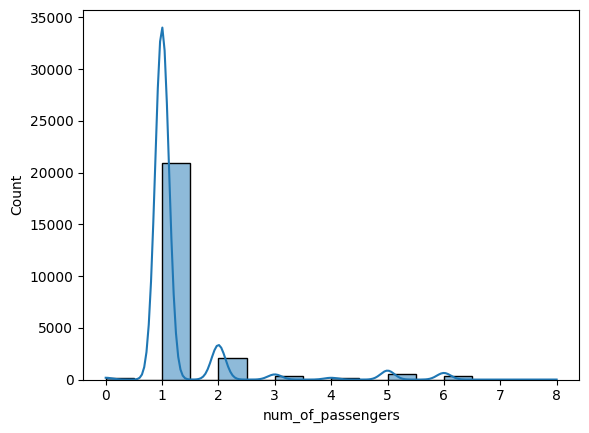

In [ ]:
sns.histplot(data=df,x='num_of_passengers',kde=True)
plt.show()

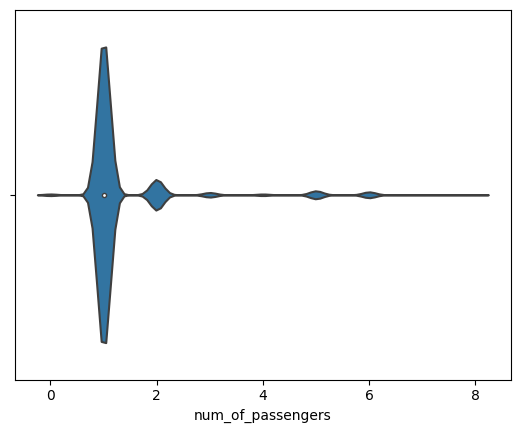

In [ ]:
sns.violinplot(x='num_of_passengers', data=df)
plt.show()

In [ ]:

data_distance=df['distance_traveled']
# Calculate mean and standard deviation for each column
mean = data_distance.mean()
std_dev = data_distance.std()

# Calculate Z-scores for the entire DataFrame
z_scores = (data_distance - mean) / std_dev

print(z_scores)


0       -0.408943
1       -0.270910
2       -0.333837
3        0.175668
4       -0.542916
           ...   
24402   -0.575395
24403    0.015306
24404   -0.542916
24405   -0.291209
24406   -0.875820
Name: distance_traveled, Length: 24407, dtype: float64


In [ ]:
# Create a box plot of Z-scores
'''plt.figure(figsize=(8, 6))
z_scores.plot()
plt.title('Box Plot of Z-Scores')
plt.ylabel('Z-Score')
plt.xlabel('Columns')
plt.show()'''

"plt.figure(figsize=(8, 6))\nz_scores.plot()\nplt.title('Box Plot of Z-Scores')\nplt.ylabel('Z-Score')\nplt.xlabel('Columns')\nplt.show()"

In [ ]:
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
fig = px.box(z_scores)
fig.update_layout(
    title='Box Plot of Z-Scores (Plotly Express)',
    xaxis_title='Distance Travelled',
    yaxis_title='Z-Score'
)
fig.show()

In [ ]:
a='fare'
b='tip'
pear_corr_coeff=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a) +" and "+ str(b)+":",pear_corr_coeff )

Correlation Coefficient for fare and tip: 0.3130666314944333


In [ ]:
a='fare'
b='distance_traveled'
pear_corr_coeff=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a) +" and "+ str(b)+":",pear_corr_coeff )

Correlation Coefficient for fare and distance_traveled: 0.8608387230736348


In [ ]:
a='fare'
b='trip_duration'
pear_corr_coess=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a)+" and "+str(b)+":",pear_corr_coeff)

Correlation Coefficient for fare and trip_duration: 0.3130666314944333


In [ ]:
a='fare'
b='trip_duration'
pear_corr_coess=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a)+" and "+str(b)+":",pear_corr_coeff)

In [ ]:
a='fare'
b='num_of_passengers'
pear_corr_coess=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a)+" and "+str(b)+":",pear_corr_coeff)

Correlation Coefficient for fare and num_of_passengers: 0.3130666314944333
